# **SVM - Kernel comparison**

## Kernel interpretation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from PIL import Image
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles #Generador datos isotropico

(250, 2) (250,)


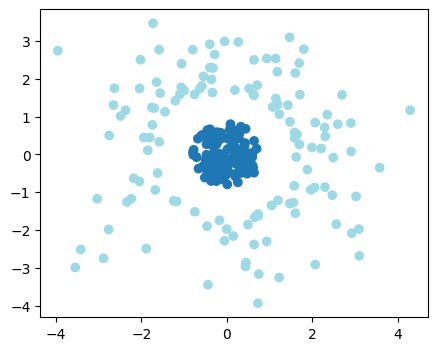

In [ ]:
X, y = make_gaussian_quantiles(cov=2,
                                 n_samples = 250 , n_features = 2 ,
                                 n_classes = 2 , random_state = 1)

print(X.shape, y.shape)
X[y==0]=X[y==0] * 0.5#Juntar datos en la gráfica
_, ax= plt.subplots(figsize=(5,4))
plt.scatter( X[:,0] , X[:,1] , c=y , cmap='tab20')

In [ ]:
#Función cuadratica para separar las caracteriticas en forma circular
z= X[:,0]**2+X[:,1]**2
print(z.shape)



(250,)


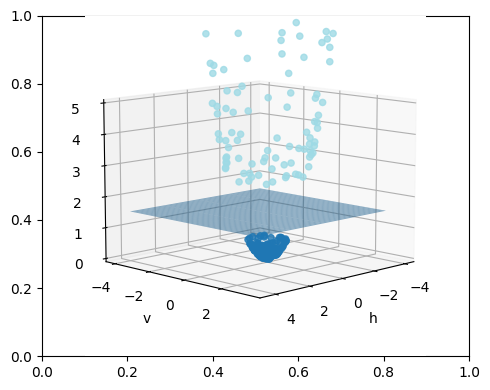

In [ ]:
#Grafica
f, _ = plt.subplots(figsize=(5,4))
ax = f.add_subplot(projection='3d')
ax.view_init(10, 45) #Configurar vista inicial, en grados
ax.scatter3D( X[:,0] , X[:,1] , z , c = y ,alpha=0.8 ,cmap='tab20')
plt.tight_layout()
ax.set_zlim(0,5)
ax.set_xlabel('h')
ax.set_ylabel('v')
#Creación de plano para separar los datos
h_grid, v_grid = np.meshgrid(np.linspace( -4, 4 , 5), np.linspace( -4 , 3 , 50))
z_grid=np.ones(h_grid.shape)*1.5 #vector de unos para la linea que debe ser constante
ax.plot_surface(h_grid,v_grid,z_grid, alpha=0.5)

#Gift


In [ ]:
# Sve all figs
for angle in range (0,91, 5):
  f, _ = plt.subplots(figsize=(8,7))
  ax=f.add_subplot(projection='3d')
  ax.view_init(angle,45) #cambio de angulos en las tomas
  ax.scatter3D(X[:,0] , X[:,1] , z , c = y ,alpha=0.8 ,cmap='tab20')
  ax.plot_surface(h_grid,v_grid,z_grid, alpha=0.5)
  plt.tight_layout()
  plt.savefig('imgs/{0}.png'.format(angle))
  plt.close(),plt.clf()


<Figure size 640x480 with 0 Axes>

In [ ]:
import os #Gestionar archivos del sistema
from PIL import Image
from natsort import natsorted, ns #organizar imagenes

list_images=[]
# Save a gif
#print(natsorted(os.listdir('imgs/')))
for img in natsorted(os.listdir('imgs/')):
  image=Image.open('imgs/'+img)
  list_images.append(image)

image.save("animation.gif", save_all=True, append_images=list_images, duration=200, loop=0)

## SVM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

(250, 2) (250,)


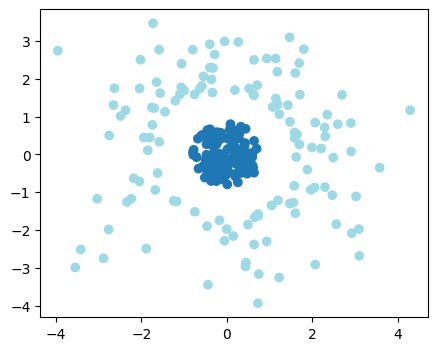

In [ ]:
# we create 100 separable points
X, y = make_gaussian_quantiles(cov=2,
                                 n_samples = 250 , n_features = 2 ,
                                 n_classes = 2 , random_state = 1)

print(X.shape, y.shape)
X[y==0]=X[y==0] * 0.5#Juntar datos en la gráfica
_, ax= plt.subplots(figsize=(5,4))
plt.scatter( X[:,0] , X[:,1] , c=y , cmap='tab20')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from drive.MyDrive.LP1.plt__grid import plot_decision_grid

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
kernels = ['linear', 'poly', 'rbf']

_, axes = plt.subplots(1,3, figsize = (20,5))

# fit the model
for kernel in kernels:
    clf = svm.SVC(kernel = kernel , gamma = 1)
    clf.fit( X , y )
    plot_decision_grid(clf,X,y,offset=0.1)
    # x_min, x_max = _ , _
    # y_min, y_max = _ , _

    # x_dim, y_dim = np.meshgrid(np.arange( _ , _ , 0.01), np.arange( _ , _ , 0.01))
    # predictions = clf.predict(np.c_[x_dim.ravel(), y_dim.ravel()])

    # predictions = predictions.reshape( _ )
    # axes[i].pcolormesh( _ , _ , predictions, cmap = plt.cm.Paired)
    # axes[i].contour( _ , _ , predictions, colors=['k', 'k'], linestyles=['-', '-'], levels=[0, 1])

    # axes[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 90, facecolors = 'none', edgecolors = 'k')

    # axes[i].scatter( _ , _ , c = _ , cmap=plt.cm.Paired, edgecolors='k')
    # axes[i].set_axis_off()

plt.show()

Create a function that plots the decision boundaries of a given SVM

## In real data

Evaluate the different SVM kernels in the Iris and Fruits datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.datasets import load_iris # Iris dataset
from sklearn.svm import SVC
from drive.MyDrive.LP1.plt__grid import plot_decision_grid
from sklearn import svm

In [ ]:
#Iris
iris = load_iris() # Load the iris dataset
iris_x = iris.data[:,:2] # Features. We'll pick 2
iris_y = iris.target # Labels


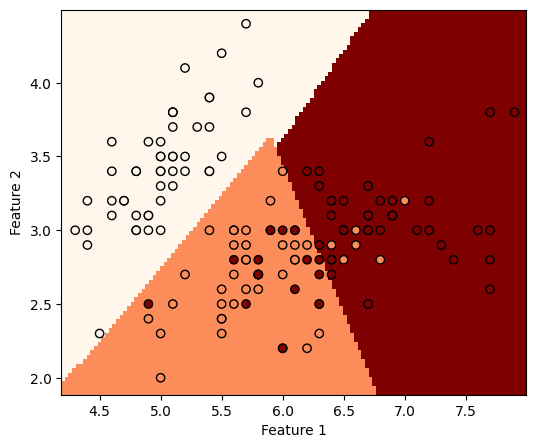

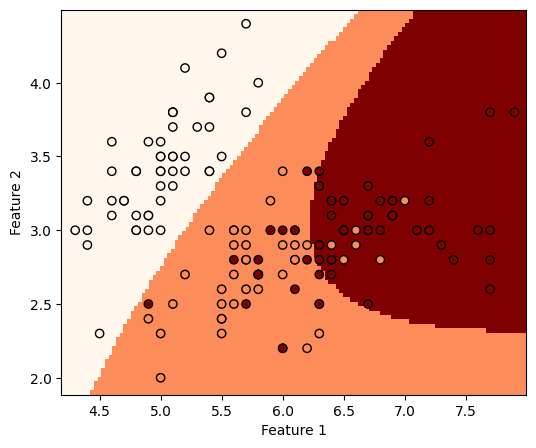

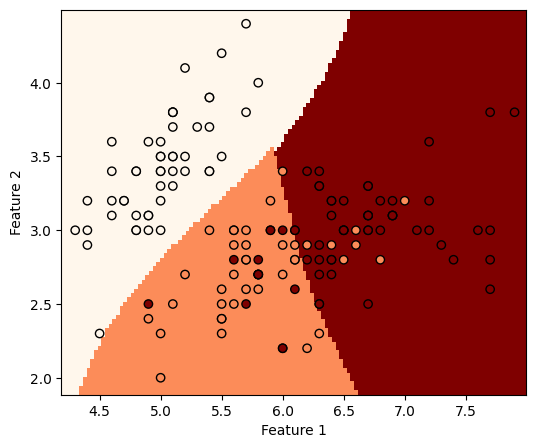

In [ ]:
kernels = ['linear', 'poly', 'rbf']
# fit the model
for kernel in kernels:
    clf = svm.SVC(kernel = kernel , gamma = 1)
    clf.fit( iris_x , iris_y )
    plot_decision_grid(clf,iris_x,iris_y,offset=0.1)
plt.show()

In [ ]:
#fruits
fruits=pd.read_csv('/content/fruits_data_ext - fruits_data_ext.csv')
# Cargar el conjunto de datos "fruits"
fruits.info()

# Limpiar y convertir columnas a formato numérico
fruits['mass'] = fruits['mass'].replace('[\.,]', '', regex=True).astype(float)
fruits['width'] = fruits['width'].replace('[\.,]', '', regex=True).astype(float)
fruits['height'] = fruits['height'].replace('[\.,]', '', regex=True).astype(float)
fruits['color_score'] = fruits['color_score'].replace('[\.,]', '', regex=True).astype(float)

# Seleccionar características numéricas
X = fruits[['mass', 'width', 'height', 'color_score']]

# Visualizar las primeras filas de los datos
print(X.head())


# Seleccionar características numéricas
X = fruits[['mass', 'width', 'height', 'color_score']]

# Visualizar las primeras filas de los datos
print(X.head())

# Acceder a los datos y las etiquetas
#X = fruits.data  # Datos
#y = fruits.target  # Etiquetas
# Suponiendo que tienes los datos en un DataFrame de pandas llamado "fruits_data"
X = fruits[['mass', 'width', 'height', 'color_score']]  # Características
y = fruits['fruit_label']  # Variable objetivo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     177 non-null    int64  
 1   fruit_label    177 non-null    int64  
 2   fruit_name     177 non-null    object 
 3   fruit_subtype  177 non-null    object 
 4   mass           177 non-null    float64
 5   width          177 non-null    object 
 6   height         177 non-null    object 
 7   color_score    177 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 11.2+ KB
    mass  width  height  color_score
0  192.0   84.0    73.0         55.0
1  180.0   80.0    68.0         59.0
2  176.0   74.0    72.0          6.0
3   86.0   62.0    47.0          8.0
4   84.0   60.0    46.0         79.0
    mass  width  height  color_score
0  192.0   84.0    73.0         55.0
1  180.0   80.0    68.0         59.0
2  176.0   74.0    72.0          6.0
3   86.0   62.0    47.0